### **TITANIC** 
Prediction of passenger survival

---
--- 


 Following content regards data collected 
from disasterous voyage of RMS Titanic - a British passenger liner which was the largest afloat ship at given time. Titanic went on route from Liverpool to New York City in 10th of April 1912, having 2224 passengers and crew onboard. During this trip, it striked an iceberg which was the cause of sinking the ship and subsequently death of more than 1500 people of various status, gender, age, family relations etc. \\


In this work relations and dependencies occuring in dataset given in https://github.com/agconti/kaggle-titanic.git shall be examined in order to complement or filter out features meaningfull for further implementations to classyfying models.



In [0]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from termcolor import colored
%matplotlib inline

#Loading data and displaying its details




In [0]:
!git clone https://github.com/agconti/kaggle-titanic.git


fatal: destination path 'kaggle-titanic' already exists and is not an empty directory.


In [0]:
test_data =  pd.read_csv("/content/kaggle-titanic/data/test.csv")
train_data = pd.read_csv("/content/kaggle-titanic/data/train.csv")


In [0]:
train_data.info()
train_data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Ali, Mr. William",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


As it can be seen some features are have numerical values like "Fare" of "Pclass" which can be used directly, but there are ones with object values which will be later trnsformed to numerical if applicable.

Meaning of subsequent labels are described below:

PassengerId: order number assigned to passenger - irrelevant for data processing

Survival: Survival (0 = No; 1 = Yes) - describe if passenger died or lived through catastrophy 

Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd) - passenger travel conditions dependent on ticket bought, the lower number the better conditions and higher voyage fare 

Name: Name of passenger

Sex: Sex of passenger (male, female) 

Age: Age of pasenger

Sibsp: Number of Siblings/Spouses Aboard

Parch: Number of Parents/Children Aboard

Ticket: Ticket Number 

Fare: Passenger Fare - price of ticket 

Cabin: Cabin assigned to passenger for voyage

Embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

#Looking for missing values




In [0]:
print(colored(pd.concat([train_data.isnull().sum(), round(train_data.isnull().sum()/train_data.isnull().count()*100, 1)],axis=1, keys=['Missing train data', '%']),'red'))
print('')
print(colored(pd.concat([test_data.isnull().sum(), round(test_data.isnull().sum()/test_data.isnull().count()*100, 1)],axis=1, keys=['Missing test data', '%']),'blue'))

             Missing train data     %
PassengerId                   0   0.0
Survived                      0   0.0
Pclass                        0   0.0
Name                          0   0.0
Sex                           0   0.0
Age                         177  19.9
SibSp                         0   0.0
Parch                         0   0.0
Ticket                        0   0.0
Fare                          0   0.0
Cabin                       687  77.1
Embarked                      2   0.2

             Missing test data     %
PassengerId                  0   0.0
Pclass                       0   0.0
Name                         0   0.0
Sex                          0   0.0
Age                         86  20.6
SibSp                        0   0.0
Parch                        0   0.0
Ticket                       0   0.0
Fare                         1   0.2
Cabin                      327  78.2
Embarked                     0   0.0


Dropping from train and test datasets features having inconsistent or irrelevant data like **PassengerId**, **Name** and **Ticket** and **Cabin** for having too many missing values (over 77% and 78% of training and test data respectively).


Performing conversion into digital values of data like \\
**Sex**: female=>0, male=>1 and \\
**Embarked** (C = Cherbourg; Q = Queenstown; S = Southampton) C=>0, Q=>1, S=>2.

In [0]:
train_data_cleaned=train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_data_cleaned=test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


train_data_num=train_data_cleaned.replace(["female","male"],[0,1])
train_data_num=train_data_num.replace(["C","Q","S"],[0,1,2])

test_data_num=test_data_cleaned.replace(["female","male"],[0,1])
test_data_num=test_data_num.replace(["C","Q","S"],[0,1,2])
train_data_num.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2.0
1,1,1,0,38.0,1,0,71.2833,0.0
2,1,3,0,26.0,0,0,7.9250,2.0
3,1,1,0,35.0,1,0,53.1000,2.0
4,0,3,1,35.0,0,0,8.0500,2.0


In [0]:
print(colored('Train data','red'))
train_data_num.describe(include='all')


Train data


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.535433
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [0]:
print(colored('Test data','blue'))
test_data_num.describe(include='all')

Test data


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188,1.401914
std,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576,0.854496
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,1.000000
50%,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200,2.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000,2.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


Now all left features are numerical but still have some missing data to be handled. 

Quantiles are giving interesting indications, 75% of passengers had no more than 39 years but maximal value reaches 80 years and therefor 41 year gap is covered by 25% od data. Similar situation goes for "Fare" feature where most of data is concentrated in range (0,31.5) but maximal value reaches even 512.3291. Such disproportions will further visualised and investigated. 

Feature "SibSp" and "Parch" consist of 9 and 10 classes respectively but 75% of "SibSp" data are within two classes "0" and "1" and in "Parch" the same ratio contains one class - "0". Features "Pclass" and "Embarked" have slightly more dispersed data, 50% of data goes to one out of 3 classes.




#Filling out missing data



"Age" missing values will be filled by random integers from the “discrete uniform” distribution of the specified dtype in the “half-open” interval [low, high). \\
  Value **low = mean + std(standard deviation)** and **high = mean + std**, both metrics are calculated for train and test data separately.

In [0]:
data = [train_data_num, test_data_num]
data1=[]
for dataset in data:
    mean = dataset["Age"].mean()
    std = dataset["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    print('mean:',mean,'std:',std,'is null:',is_null)
    # compute random numbers between the mean -  std and mean + std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = dataset["Age"].astype(int)
    print(dataset['Age'].isnull().sum())
    data1.append(dataset)
#checking missing values for Age data
train_data_num, test_data_num = data1
test_data_num["Age"].isnull().sum()




mean: 29.69911764705882 std: 14.526497332334044 is null: 177
0
mean: 30.272590361445783 std: 14.18120923562442 is null: 86
0


0

"Embarked" data are filled with most common value:

In [0]:
#Embarked 
train_data_num['Embarked'].describe()

count    889.000000
mean       1.535433
std        0.792088
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: Embarked, dtype: float64

which is "2" basing on given statistic.

In [0]:
#As 2 is most common value, this will be our choice to fill in missing values
common_value = 2
data = [train_data_num, test_data_num]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)


As for "Fare" replacing one missing data with "0" should not disturb statistic  

In [0]:

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

Checking if there are no missing values left.

In [0]:
print(colored(pd.concat([train_data_num.isnull().sum(), round(train_data_num.isnull().sum()/train_data_num.isnull().count()*100, 1)],axis=1, keys=['Missing train data', '%']),'red'))
print('')
print(colored(pd.concat([test_data_num.isnull().sum(), round(test_data_num.isnull().sum()/test_data_num.isnull().count()*100, 1)],axis=1, keys=['Missing test data', '%']),'blue'))

          Missing train data    %
Survived                   0  0.0
Pclass                     0  0.0
Sex                        0  0.0
Age                        0  0.0
SibSp                      0  0.0
Parch                      0  0.0
Fare                       0  0.0
Embarked                   0  0.0

          Missing test data    %
Pclass                    0  0.0
Sex                       0  0.0
Age                       0  0.0
SibSp                     0  0.0
Parch                     0  0.0
Fare                      0  0.0
Embarked                  0  0.0


#Analysis of data relations 

This section will cover exploration of data distribution and also relations between features in train dataset. 

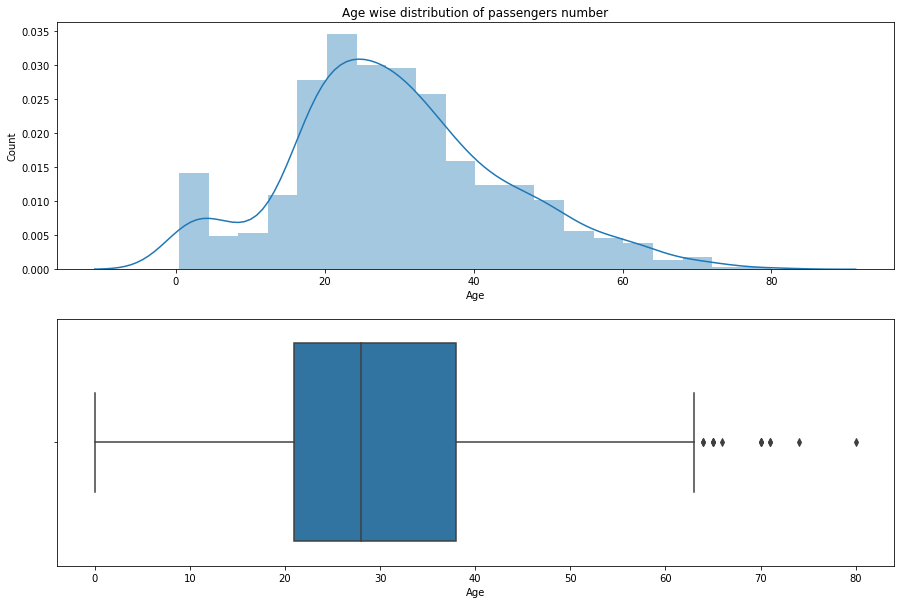

In [0]:
plt.figure(figsize = (15,10))
plt.subplot(2,1,1)
plt.title('Age wise distribution of passengers number')

ax1 = sns.distplot(train_data_cleaned['Age'].dropna(),bins=20, kde=True)
ax1.set(xlabel = "Age", ylabel = "Count")
plt.subplot(2,1,2)
ax2 = sns.boxplot(train_data_num.Age)

[Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Male')]

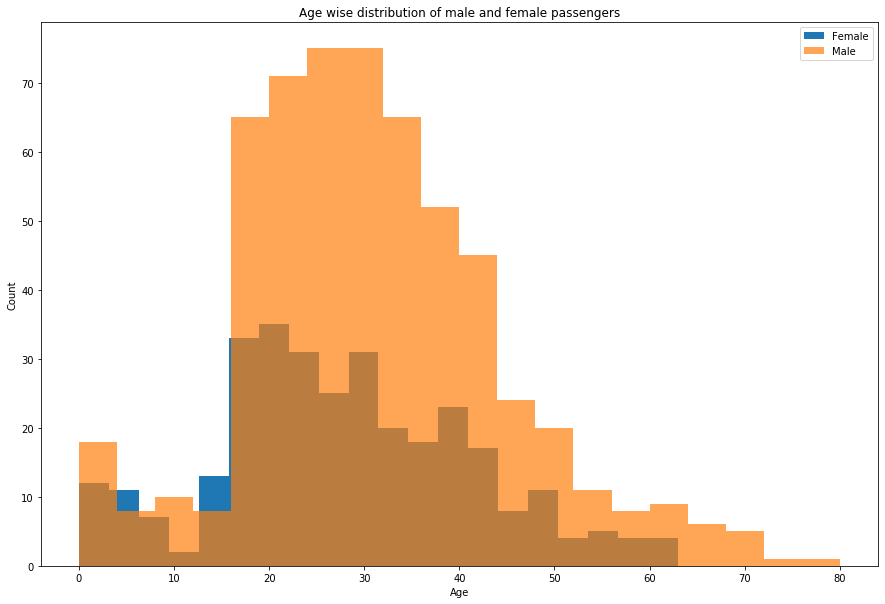

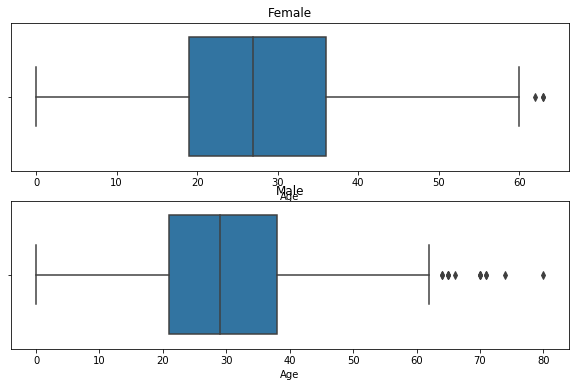

In [0]:
#Age wise Distribution of Male and Female passengers
plt.figure(figsize = (15,10))
plt.hist(train_data_num['Age'][(train_data_num['Sex'] == 0)].dropna(), bins=20, label='Female', histtype='stepfilled')
plt.hist(train_data_num['Age'][(train_data_num['Sex'] == 1)].dropna(), bins=20, label='Male', alpha=.7, histtype='stepfilled')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age wise distribution of male and female passengers')
plt.legend()

plt.figure(figsize = (10,6))
plt.subplot(2,1,1)
ax2 = sns.boxplot(train_data_num['Age'][(train_data_num['Sex'] == 0)])
ax2.set(xlabel = "Age", title = "Female")

plt.subplot(2,1,2)
ax3 = sns.boxplot(train_data_num['Age'][(train_data_num['Sex'] == 1)])
ax3.set(xlabel = "Age", title = "Male")


As one can see 50% of population onboard is between 20 and 38 years old, there is also a large drop below 16 year indicating thast only small part of crew brought their children. Distinguishing it by sex shows that female population is shifted a little towards younger age and less numerous but distribution is simillar. 

Women survived: 233 . Women died: 81 , thats: 25.796178343949045 %
Men survived: 109 . Men died: 468 , thats: 81.10918544194108 %


Text(0.5, 1.0, 'Male')

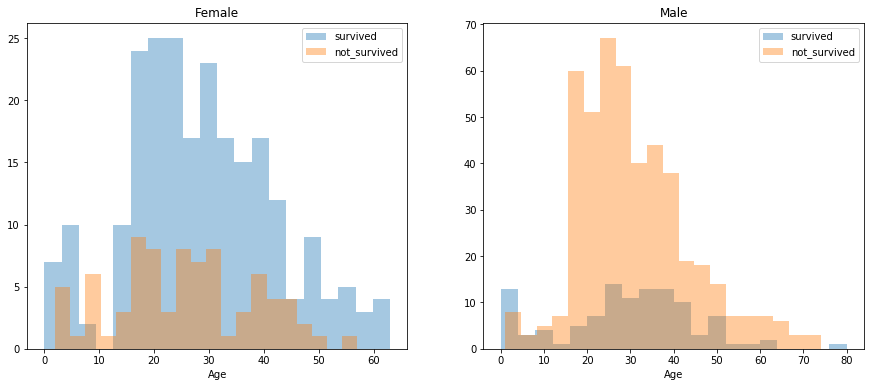

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))


women = train_data_num[train_data_num['Sex']==0]
men = train_data_num[train_data_num['Sex']==1]

###################################################################################################################################
women_dead = women[women['Survived']==0]['Survived'].count()
women_alive = women[women['Survived']==1]['Survived'].count()

men_dead = men[men['Survived']==0]['Survived'].count() 
men_alive = men[men['Survived']==1]['Survived'].count()

print('Women survived:', women_alive , '. Women died:', women_dead, ', thats:', 100*women_dead/(women_dead+women_alive),"%"  )
print('Men survived:', men_alive ,'. Men died:',men_dead, ', thats:', 100*men_dead/(men_dead+men_alive),"%" )
###################################################################################################################################


ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=20, label = 'survived', ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=20, label = 'not_survived', ax = axes[0], kde =False)

ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=20, label = 'survived', ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=20, label = 'not_survived', ax = axes[1], kde = False)


ax.legend()
ax.set_title('Male')

At first glance a large disproportion on deaths between sexes can be seen, around 75% of females lived through crash of Titanic and only 19% of males. Only male infants has greater survivability than rest of males, simmilar tendency goes for female infants which presumably were close to surviving females. 



Taking into consideration amenities of voyage described as Pclass survival tendency shapes as follows.


Number of 1'st lass pasengers - 216
Number of 2'nd lass pasengers - 184
Number of 3'rd lass pasengers - 491


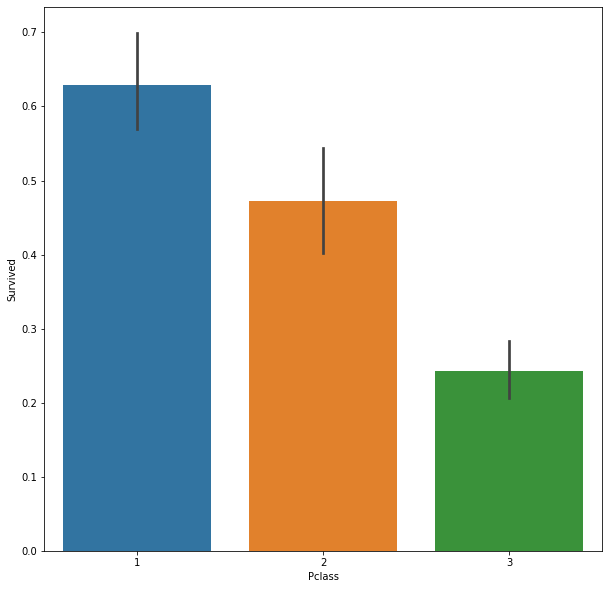

In [0]:
plt.figure(figsize = (10,10))
x = sns.barplot(x="Pclass", y="Survived", data=train_data_num)
ax.set_title('Survival rate related to ticket class')

print('Number of 1\'st lass pasengers -', colored(train_data_num['Pclass'][train_data_num['Pclass']==1].count()
,'blue'))

print('Number of 2\'nd lass pasengers -', colored(train_data_num['Pclass'][train_data_num['Pclass']==2].count()
,'yellow'))

print('Number of 3\'rd lass pasengers -', colored(train_data_num['Pclass'][train_data_num['Pclass']==3].count()
,'green'))


Text(0.5, 1.0, 'Survival rate related to ticket class')

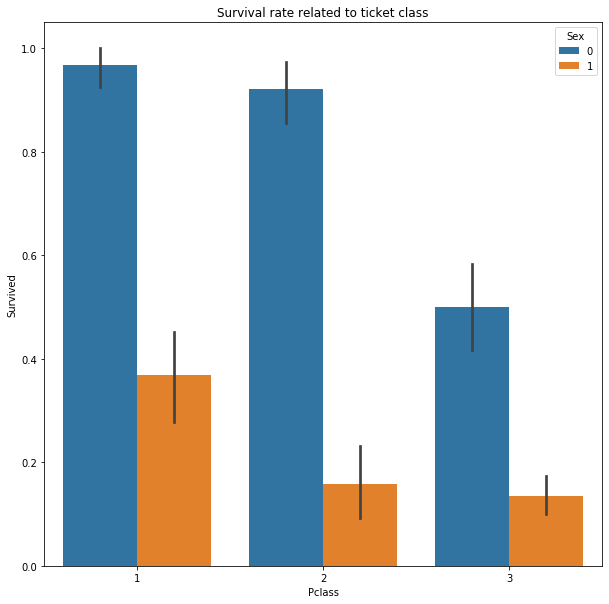

In [0]:
plt.figure(figsize = (10,10))
ax = sns.barplot(x="Pclass", y="Survived", hue="Sex", data=train_data_num)
ax.set_title('Survival rate related to ticket class')

As expected more privilaged passengers have greater survivability rate, steadely decreasing with worst class. \\

Splitting this distribution by gender (0 -females, 1 -males), shows that almost all women from 1'st and 2'nd class survived - more than 95% survivability which is nearly twice as mus as women from 3'rd class which only half survivability drops nearly by half, from around 95% to around 50%. \\

In male poplulation the oposite relation arises, being 1'st class passenger resulted in nearly 40% of survivality, twice as much as survivability of 2'nd and 3'rd class ones with scores below 20%.


Also it is worth to note that 3'rd class passengers constitute more than 50% of all passengers and thus its low survivability translates to much higher losses in passengers.

<Figure size 720x720 with 0 Axes>

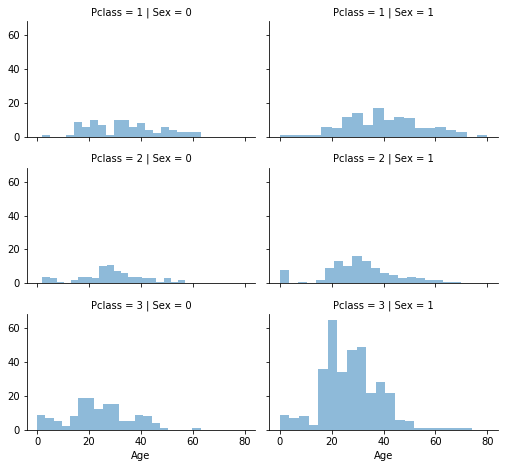

In [0]:
plt.figure(figsize = (10,10))
grid = sns.FacetGrid(train_data_num, col='Sex', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Looking at age dependent distribution it can be seen that all classes are more poplulated by males but in 3'rd class this difeerence is much more significant. 

Also young passengers (16 years and less) mostly occurs in 3'rd class in fewer numbers in 2'nd classs and almost absent among 1'st class passengers, while their survivability was relatively high.  

<Figure size 720x720 with 0 Axes>

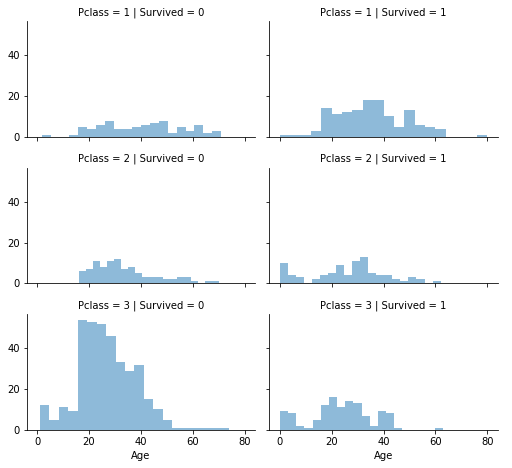

In [0]:
plt.figure(figsize = (10,10))

grid = sns.FacetGrid(train_data_num, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Reffering to young passengers, graph above clearly indicates that, with some minor exceptions, most of dead was allocated in 3'rd class. \\

Also, the disctinct rise of dead to survived ratio among females around 10 age old comes only from girls of 3'rd class.

0%: 0.0
25%: 7.9104
50%: 14.4542
75%: 31.0
100%: 512.3292


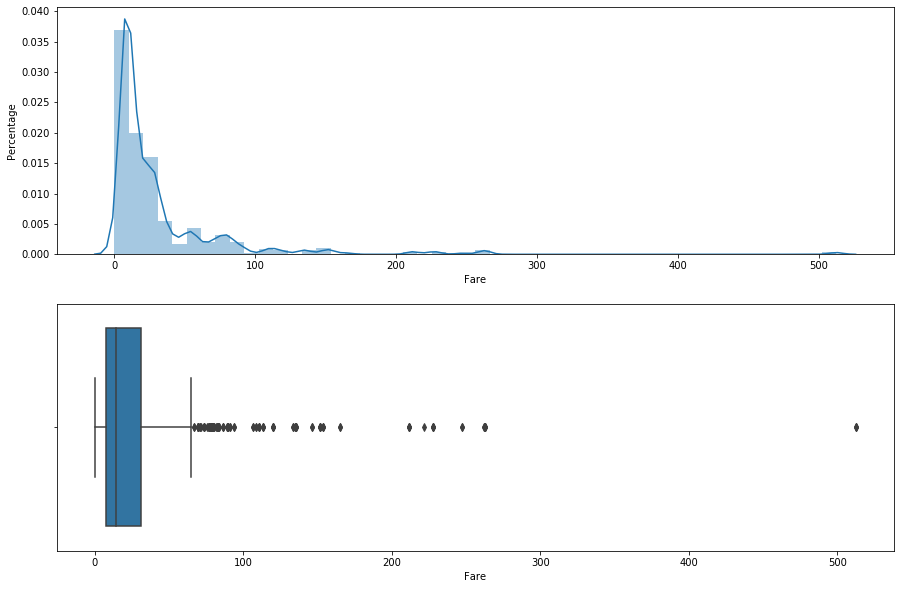

In [0]:
#Fare Analysis
plt.figure(figsize = (15,10))
plt.subplot(2,1,1)
ax1 = sns.distplot(train_data_cleaned.Fare)
ax1.set(xlabel = "Fare", ylabel = "Percentage")
plt.subplot(2,1,2)
ax2 = sns.boxplot(train_data_cleaned.Fare)
for i in np.arange(0,1.25,0.25):
    print("{0:.0f}%:".format(i * 100), train_data_cleaned['Fare'].quantile(i))

Fare is ancontinuous varible with highly irregular distribution, most of data is packed between 0 and 31 but full range reaches 513. Below this distribution is sliced in relation to Pclass and Survival rate. 

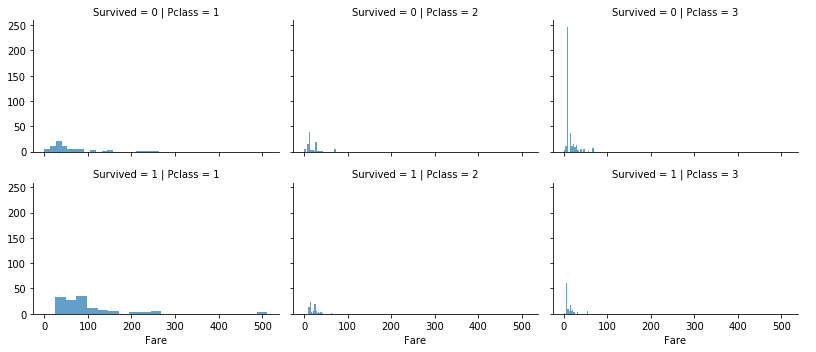

In [0]:
grid = sns.FacetGrid(train_data_num, col='Pclass', row='Survived', height=2.5, aspect=1.5)
grid.map(plt.hist, 'Fare', alpha=.7, bins=20)
grid.add_legend();

The most of this distribution goes for dead people in 3'rd class who payed also the lowest price for voyage it is few times more than the survivours. 2'nd class fare is still below 100 but its dead to survived ratio is close to one. In 1'st class most dead are also those who payed below 50 , and most of survivours have payed less than 100, but overally this group has around twice as much survivors than dead.

Text(0.5, 1.0, 'Survival rate related to number of siblings/spouses aboard')

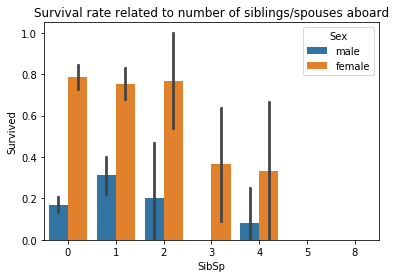

In [0]:
ax = sns.barplot(x="SibSp", y="Survived", hue="Sex", data=train_data_cleaned)
ax.set_title('Survival rate related to number of siblings/spouses aboard')

Text(0.5, 1.0, 'Survival rate related to number of parents/children aboard')

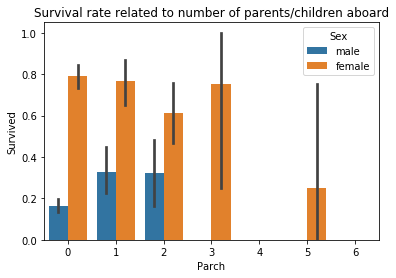

In [0]:
ax1 = sns.barplot(x="Parch", y="Survived", hue="Sex", data=train_data_cleaned)
ax1.set_title('Survival rate related to number of parents/children aboard')

Having relatives onboard seems like a positive element especially for males to some extent, and looks like females experience a little impact from those factors. But it is  clear that this relation to survival have insufficient representation across the scope, although there is a specific drop of surviva rate, either for males as for females, when Parch crosses value '3' and SibSp '2'.

Text(0.5, 1, 'Survival rate related to port of embarkation')

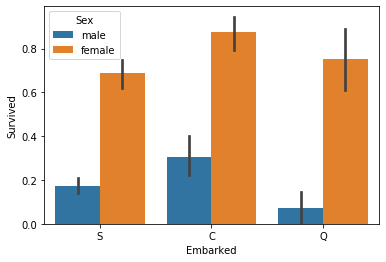

In [0]:
ax = sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train_data_cleaned)
ax1.set_title('Survival rate related to port of embarkation')

Embarktion shows that those who got onboard in Cherbourg had the highest rate of survival for both sexes, but where Queenstown has 2'nd place for females and last for males, Southampton has those in opposite.

#Categorising Age data

Age data was distributed in 8 (0,1,..,8) categories in such way so each age gap contains relatively similar amount of data points. As it can be deduced from general distribution slicing range (0,80) into 8 equal parts will result in putting more than 50% of data into 2 categories.



In [0]:
train_data_num.loc[ train_data_num['Age'] <= 16, 'Age'] = 0
train_data_num.loc[(train_data_num['Age'] > 16) & (train_data_num['Age'] <= 20), 'Age'] = 1
train_data_num.loc[(train_data_num['Age'] > 20) & (train_data_num['Age'] <= 23), 'Age'] = 2
train_data_num.loc[(train_data_num['Age'] > 23) & (train_data_num['Age'] <= 27), 'Age'] = 3
train_data_num.loc[(train_data_num['Age'] > 27) & (train_data_num['Age'] <= 30), 'Age'] = 4
train_data_num.loc[(train_data_num['Age'] > 30) & (train_data_num['Age'] <= 34), 'Age'] = 5
train_data_num.loc[(train_data_num['Age'] > 34) & (train_data_num['Age'] <= 38), 'Age'] = 6
train_data_num.loc[(train_data_num['Age'] > 38) & (train_data_num['Age'] <= 46), 'Age'] = 7
train_data_num.loc[train_data_num['Age'] > 46, 'Age'] = 8


#checking missing values for Age data after slicing
train_data_num["Age"].isnull().sum()



0

In [0]:
#checking data distribution
train_data_num['Age'].value_counts()

7    115
3    114
0    111
1    104
8     98
5     94
4     94
2     85
6     76
Name: Age, dtype: int64

In [0]:
test_data_num.loc[ test_data_num['Age'] <= 16, 'Age'] = 0
test_data_num.loc[(test_data_num['Age'] > 16) & (test_data_num['Age'] <= 20), 'Age'] = 1
test_data_num.loc[(test_data_num['Age'] > 20) & (test_data_num['Age'] <= 24), 'Age'] = 2
test_data_num.loc[(test_data_num['Age'] > 24) & (test_data_num['Age'] <= 27), 'Age'] = 3
test_data_num.loc[(test_data_num['Age'] > 27) & (test_data_num['Age'] <= 30), 'Age'] = 4
test_data_num.loc[(test_data_num['Age'] > 30) & (test_data_num['Age'] <= 34), 'Age'] = 5
test_data_num.loc[(test_data_num['Age'] > 34) & (test_data_num['Age'] <= 38), 'Age'] = 6
test_data_num.loc[(test_data_num['Age'] > 38) & (test_data_num['Age'] <= 46), 'Age'] = 7
test_data_num.loc[test_data_num['Age'] > 46, 'Age'] = 8


#checking missing values for Age data
test_data_num["Age"].isnull().sum()


0

Similar categorization will be done for "Fare" values, splitting data into 6 categories.

In [0]:
data = [train_data_num, test_data_num]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

Results of transormation are presented on graph below. 

*   List item
*   List item



0%: 0.0
25%: 0.0
50%: 1.0
75%: 2.0
100%: 5.0


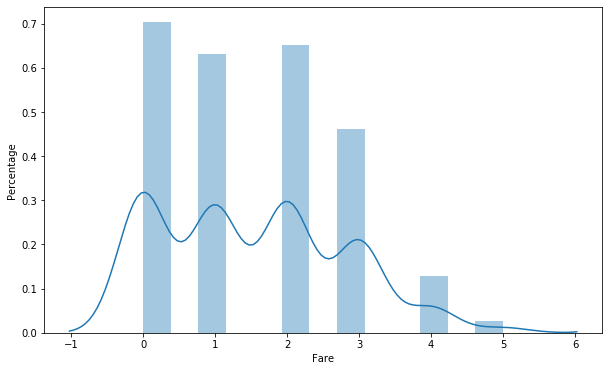

In [0]:
#Fare Analysis
plt.figure(figsize = (10,6))
ax1 = sns.distplot(train_data_num.Fare)
ax1.set(xlabel = "Fare", ylabel = "Percentage")
for i in np.arange(0,1.25,0.25):
    print("{0:.0f}%:".format(i * 100), train_data_num['Fare'].quantile(i))

#**Machine Learning models and training**


In this section preprocessed datasets will be introduced to following machine learning models -  Stochastic Gradient Descent, Decision Tree, Random Forest,Logistic Regression, K-Nearest Neighbours and Gaussian Naive Bayes.

In [0]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [0]:
X_train = train_data_num.drop("Survived", axis=1)
Y_train = train_data_num["Survived"]
X_test  = test_data_num

In [0]:
########################################
#stochastic gradient Descent
sgd = linear_model.SGDClassifier(max_iter=100, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

calibrator = CalibratedClassifierCV(sgd, cv='prefit')
sgd_model=calibrator.fit(X_train, Y_train)
sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

Mean accuracy of random forest is:  91.13 %


,importance
feature,
Sex,0.331
Age,0.218
Fare,0.130
Pclass,0.127
SibSp,0.074
Parch,0.066
Embarked,0.055


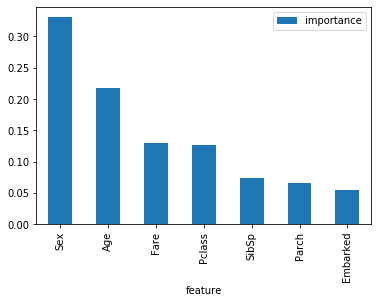

In [0]:
#################################################
#Random Forest:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print('Mean accuracy of random forest is: ',acc_random_forest,'%')
#Selecting features with assigned by model wages that resembles its importance in outcome prediction
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

importances.head(15)

Most significant element for Random Forest model is Sex,	Age,	Fare and	Pclass, thus changing those parameters should show the biggest differencies in predicted outcome. 

In [0]:
###########################################################
#Logistic Regression:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
gaussian

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
###########################################################
#K Nearest Neighbor:
#KNN 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train) 
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)


In [0]:
#Gaussian Naive Bayes:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test) 
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)


In [0]:
##############################################################
#Decision Tree
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

# Results of trained models 

In [0]:
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [ acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(7)

,Model
Score,
91.13,Random Forest
91.13,Decision Tree
85.97,KNN
79.80,Logistic Regression
78.90,Stochastic Gradient Decent
76.54,Naive Bayes


#Prediction of survivability

This section contains tools to create their own test data and check what are chances of survival, calculated by selected model, for person with given characteristics. 

In [0]:
#function prints out input data and predicted Survivability with percentage certainty

def data_preprocessing(passenger_features):
  passenger_features=passenger_features.replace(["female","male"],[0,1])
  passenger_features=passenger_features.replace(["C","Q","S"],[0,1,2])

  passenger_features.loc[ passenger_features['Age'] <= 16, 'Age'] = 0
  passenger_features.loc[(passenger_features['Age'] > 16) & (passenger_features['Age'] <= 20), 'Age'] = 1
  passenger_features.loc[(passenger_features['Age'] > 20) & (passenger_features['Age'] <= 24), 'Age'] = 2
  passenger_features.loc[(passenger_features['Age'] > 24) & (passenger_features['Age'] <= 27), 'Age'] = 3
  passenger_features.loc[(passenger_features['Age'] > 27) & (passenger_features['Age'] <= 30), 'Age'] = 4
  passenger_features.loc[(passenger_features['Age'] > 30) & (passenger_features['Age'] <= 34), 'Age'] = 5
  passenger_features.loc[(passenger_features['Age'] > 34) & (passenger_features['Age'] <= 38), 'Age'] = 6
  passenger_features.loc[(passenger_features['Age'] > 38) & (passenger_features['Age'] <= 46), 'Age'] = 7
  passenger_features.loc[passenger_features['Age'] > 46, 'Age'] = 8

  passenger_features.loc[ passenger_features['Fare'] <= 7.91, 'Fare'] = 0
  passenger_features.loc[(passenger_features['Fare'] > 7.91) & (passenger_features['Fare'] <= 14.454), 'Fare'] = 1
  passenger_features.loc[(passenger_features['Fare'] > 14.454) & (passenger_features['Fare'] <= 31), 'Fare']   = 2
  passenger_features.loc[(passenger_features['Fare'] > 31) & (passenger_features['Fare'] <= 99), 'Fare']   = 3
  passenger_features.loc[(passenger_features['Fare'] > 99) & (passenger_features['Fare'] <= 250), 'Fare']   = 4
  passenger_features.loc[ passenger_features['Fare'] > 250, 'Fare'] = 5
  passenger_features['Fare'] = passenger_features['Fare'].astype(int)
  
  return passenger_features

In [0]:
#function prints out input data and predicted Survivability with percentage certainty  

def predict_result(trained_model, input_data):

  for index, row in input_data.iterrows():
    data = pd.DataFrame({'Pclass': [row['Pclass']],'Sex': [row['Sex']],'Age':[row['Age']],'SibSp':[row['SibSp']],	'Parch':[row['Parch']],	'Fare':[row['Fare']],	'Embarked':[row['Embarked']]})
    #print(data)

    if trained_model.predict_proba(data)[0][0] > trained_model.predict_proba(data)[0][1]:
      print('Not survived with:', trained_model.predict_proba(data)[0][0]*100, '% certainty.')
    else:
      print('Survived with:', trained_model.predict_proba(data)[0][1]*100, '% certainty.')

Below anyone can create their own passenger and check if it would survive or perish in Titanic crash, person should be using characteristic from list below, ind insert it under right category.

Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Sex: Sex of passenger (male, female)[string value]

Age: Age of pasenger

Sibsp: Number of Siblings/Spouses Aboard (0,1,...,8)

Parch: Number of Parents/Children Aboard (0,1,...,6)

Fare: Passenger Fare - price of ticket

Embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)[string value]


In [0]:
labels = train_data_num.head(0)

passenger_features = pd.DataFrame(labels.drop(['Survived'],axis=1))
passenger_features['Pclass'] = [3, 1,3,1]
passenger_features['Sex'] = ['female','female','male','male']
passenger_features['Age'] = [30, 40,30,40]
passenger_features['SibSp'] = [2,0,2,0]
passenger_features['Parch'] = [3, 0,3,0]
passenger_features['Fare'] = [300, 150,300,150]
passenger_features['Embarked'] = ["S","S","S","S"]

In [0]:
passenger_features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,female,30,2,3,300,S
1,1,female,40,0,0,150,S
2,3,male,30,2,3,300,S
3,1,male,40,0,0,150,S


Given data must be processed with "data_preprocessing" function which transforms it to format used for model training.

In [0]:
data_processed = data_preprocessing(passenger_features)

In [0]:
print(passenger_features)
print(' ')

print('Random forest')
predict_result(random_forest,data_processed)
print(' ')
print('Decision tree')
predict_result(decision_tree,data_processed)
print(' ')
print('KNN')
predict_result(knn,data_processed)
print(' ')
print('Logistic Regresion')
predict_result(logreg,data_processed)
print(' ')
print('Naive Bayes Gaussian')
predict_result(gaussian,data_processed)
print(' ')
print('Stochastic Gradient Descent')
predict_result(sgd_model,data_processed) 

   Pclass     Sex  Age  SibSp  Parch  Fare Embarked
0       3  female   30      2      3   300        S
1       1  female   40      0      0   150        S
2       3    male   30      2      3   300        S
3       1    male   40      0      0   150        S
 
Random forest
Not survived with: 88.0 % certainty.
Survived with: 99.0 % certainty.
Not survived with: 90.0 % certainty.
Not survived with: 82.28888888888888 % certainty.
 
Decision tree
Not survived with: 100.0 % certainty.
Survived with: 100.0 % certainty.
Not survived with: 100.0 % certainty.
Not survived with: 100.0 % certainty.
 
KNN
Survived with: 66.66666666666666 % certainty.
Survived with: 100.0 % certainty.
Survived with: 66.66666666666666 % certainty.
Not survived with: 66.66666666666666 % certainty.
 
Logistic Regresion
Survived with: 61.19088671630364 % certainty.
Survived with: 92.3078162184612 % certainty.
Not survived with: 89.51316291537825 % certainty.
Not survived with: 52.8639591137918 % certainty.
 
Naive Ba

Having those examples it can be seen that models with highest overall score - Random Forest and Decision Trees, are giving quite simmilar predictions with this difference that Decision Tree gave binary outcome with 100% certainty Which resembles typical overfitting in Deep Decision Trees and in this case Random Forest seems to avoid that case maintaining the same score as Decision tree. 

It can be checked on larger set of data using "test data".

In [0]:
predict_result(decision_tree,test_data_num) 

Not survived with: 100.0 % certainty.
Not survived with: 100.0 % certainty.
Not survived with: 100.0 % certainty.
Not survived with: 85.71428571428571 % certainty.
Survived with: 100.0 % certainty.
Not survived with: 75.0 % certainty.
Survived with: 75.0 % certainty.
Not survived with: 100.0 % certainty.
Survived with: 80.0 % certainty.
Survived with: 100.0 % certainty.
Not survived with: 81.25 % certainty.
Survived with: 50.0 % certainty.
Survived with: 100.0 % certainty.
Not survived with: 100.0 % certainty.
Survived with: 100.0 % certainty.
Survived with: 100.0 % certainty.
Not survived with: 100.0 % certainty.
Not survived with: 66.66666666666666 % certainty.
Not survived with: 100.0 % certainty.
Survived with: 100.0 % certainty.
Survived with: 100.0 % certainty.
Not survived with: 100.0 % certainty.
Survived with: 100.0 % certainty.
Survived with: 100.0 % certainty.
Survived with: 100.0 % certainty.
Not survived with: 100.0 % certainty.
Survived with: 100.0 % certainty.
Not surviv

Just by looking at output data it looks that Decision Tree is overfitted.

In [0]:
predict_result(random_forest,test_data_num) 

Not survived with: 98.0 % certainty.
Not survived with: 81.66666666666666 % certainty.
Not survived with: 93.35146797646797 % certainty.
Not survived with: 85.16068098568098 % certainty.
Not survived with: 58.5 % certainty.
Not survived with: 76.39325396825397 % certainty.
Survived with: 79.58517316017317 % certainty.
Not survived with: 90.5 % certainty.
Survived with: 78.65357142857142 % certainty.
Not survived with: 80.0 % certainty.
Not survived with: 79.36998322626799 % certainty.
Survived with: 53.00321810542399 % certainty.
Survived with: 99.0 % certainty.
Not survived with: 99.41666666666666 % certainty.
Survived with: 100.0 % certainty.
Survived with: 96.5 % certainty.
Not survived with: 85.58333333333333 % certainty.
Not survived with: 65.64999999999999 % certainty.
Not survived with: 77.7 % certainty.
Survived with: 91.0 % certainty.
Survived with: 96.0 % certainty.
Not survived with: 52.0 % certainty.
Survived with: 98.0 % certainty.
Survived with: 67.5 % certainty.
Survived

While output given by Random Forest model over test sample is less binary, and therefore this one will be taken as a point of reference in further discussion.

Having close Score does not mean that results will be converging to some true value, taking for example KNN model - the 3'rd highest Score, it shows oposite values for 2 out of 4 outputs. While Logistic Regression and Stochastic Gradient Descent differs only in first result with very low certainty. 
 
As for Naive Bayes Gaussian model it seems like it went completely different path of classification, having also poor Score in comparison to others. 